In [1]:
import numpy as np
import math

In [2]:
image=np.load('/home/lab/양창희/Pose Estimation/Dataset/COCO/Train2017/image1.npy')
keypoint=np.load('/home/lab/양창희/Pose Estimation/Dataset/COCO/Train2017/kp1.npy')

In [3]:
img=image[0]
kp=keypoint[0]

In [4]:
row,col,_=img.shape
stride=1
sigma=5
n_sigma=4
n_keypoints=18
x,y=kp[0][0],kp[0][1]

In [5]:
keypoint_maps=np.zeros(shape=(n_keypoints+1,
                             row,col),dtype=np.float32)

In [6]:
keypoint_map=keypoint_maps[0]

In [7]:
keypoint_map.shape

(250, 150)

In [8]:
tl = [int(x - n_sigma * sigma), int(y - n_sigma * sigma)]

In [9]:
tl[0]=max(tl[0],0)
tl[1]=max(tl[1],0)

In [10]:
br = [int(x + n_sigma * sigma), int(y + n_sigma * sigma)]
map_w, map_h = keypoint_map.shape
br[0] = min(br[0], map_w * stride)
br[1] = min(br[1], map_h * stride)

In [11]:
tl[0],tl[1],br[0],br[1]

(49, 20, 89, 60)

In [12]:
shift=stride/2-0.5

In [13]:
for map_y in range(tl[1] // stride, br[1] // stride):
    for map_x in range(tl[0] // stride, br[0] // stride):
        d2=(map_x*stride+shift-x)*(map_x * stride + shift - x)+\
        (map_y * stride + shift - y) * (map_y * stride + shift - y)
        exponent = d2 / 2 / sigma / sigma
        if exponent>4.6052: # threshold, ln(100), ~0.01
            continue
        keypoint_map[map_y,map_x]+=math.exp(-exponent)
        if keypoint_map[map_y,map_x]>1:
            keypoint_map[map_y,map_x]=1

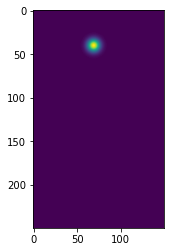

In [14]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.imshow(keypoint_map)

In [15]:
import cv2

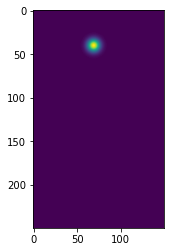

In [16]:
plt.imshow(img)
plt.imshow(keypoint_map)

In [17]:
bb=cv2.cvtColor(keypoint_map,cv2.COLOR_GRAY2RGB)

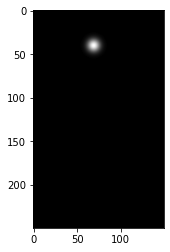

In [18]:
plt.imshow(bb)

In [19]:
np.max(img)

255

In [20]:
img=img/255

In [25]:
aimg=img+bb

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


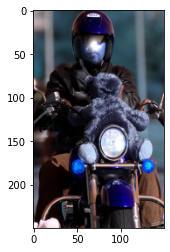

In [26]:
plt.imshow(aimg)

In [35]:
t1=np.zeros(shape=(1,250,150))
t2=np.zeros(shape=(1,250,150))

In [40]:
t3=np.concatenate((t1,t2),axis=0)

In [41]:
t3.shape

(2, 250, 150)

In [42]:
img.shape

(250, 150, 3)